- 컬럼 설명
    - `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
    - `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
    - `Description`: Product (item) name. Nominal.
    - `Quantity`: The quantities of each product (item) per transaction. Numeric.
    - `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
    - `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
    - `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
    - `Country`: Country name. Nominal. The name of the country where a customer resides.

InvoiceNo: 송장 번호입니다. 명목형 데이터입니다. 각 거래에 고유하게 부여된 6자리 정수 번호입니다. 이 번호가 'C'로 시작하면 취소된 거래임을 나타냅니다.

StockCode: 제품(상품) 코드입니다. 명목형 데이터입니다. 각 고유한 제품에 부여된 5자리 정수 번호입니다.

Description: 제품(상품) 이름입니다. 명목형 데이터입니다.

Quantity: 거래당 각 제품(상품)의 수량입니다. 수치형 데이터입니다.

InvoiceDate: 송장 발행 날짜 및 시간입니다. 수치형 데이터입니다. 거래가 발생한 날짜와 시간을 의미합니다.

UnitPrice: 단가입니다. 수치형 데이터입니다. 제품 하나당 가격을 파운드(£)로 나타냅니다.

CustomerID: 고객 번호입니다. 명목형 데이터입니다. 각 고객에게 고유하게 부여된 5자리 정수 번호입니다.

Country: 국가 이름입니다. 명목형 데이터입니다. 고객이 거주하는 국가의 이름을 나타냅니다.

### **문제 1: 데이터 로드 및 탐색**

- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.



In [155]:
pd.set_option('mode.chained_assignment',  None) # 경고 off

In [156]:
import pandas as pd


retail1 = pd.read_csv('./Year 2009-2010-표 1.csv')
retail2 = pd.read_csv('./Year 2010-2011-표 1.csv')

In [157]:
retail1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [158]:
retail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [159]:
retail2.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [160]:
retail2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [161]:
retail = pd.concat([retail1, retail2], axis=0)
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/09 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/09 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/09 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/09 7:45,1.25,13085.0,United Kingdom


 - **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [162]:
retail.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [163]:
retail.isna().mean()

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

In [164]:
retail[retail['Customer ID'].isna() ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,12/1/09 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,12/1/09 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/09 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,12/1/09 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/09 11:49,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom


### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.

In [165]:
retail[retail['Description'].isna()] # Customer ID 결측치를 제거하면 Description 도 해결된다.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,12/1/09 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,12/1/09 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,12/1/09 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,12/2/09 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,12/2/09 12:42,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/11 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/11 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/11 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/11 10:33,0.0,NaN,United Kingdom


In [166]:
retail = retail.dropna(subset=['Customer ID'])

In [167]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [168]:
retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 Total 을 생성하세요 (Quantity와 Price를 곱한 값).

In [169]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [170]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [171]:
retail['Customer ID'] = retail['Customer ID'].astype('int64')

In [172]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬하세요.

In [173]:
retail =retail.sort_values(by='InvoiceDate')

In [174]:
retail['Total'] = retail['Quantity'] * retail['Price']

In [175]:
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0


### **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

<class 'pandas.core.frame.DataFrame'>


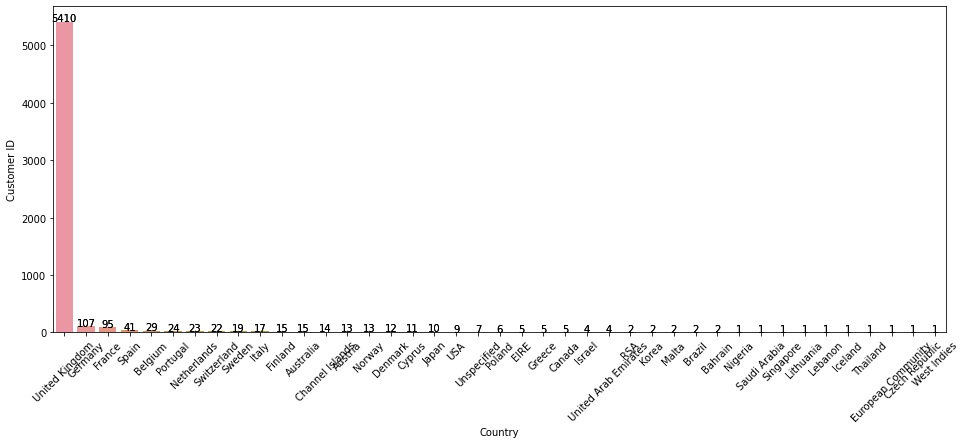

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)

temp = pd.DataFrame(retail.groupby('Country')['Customer ID'].agg('nunique')).sort_values('Customer ID', ascending=False)
print(type(temp))
temp.reset_index(inplace=True)
temp.columns = ['Country','Customer ID']
sns.barplot(x='Country', y='Customer ID', data=temp)
ax = sns.barplot(x='Country', y='Customer ID', data=temp)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,     # x 좌표 (막대의 가운데)
            p.get_height() + 5,                 # y 좌표 
            int(p.get_height()),                # 표시할 숫자 (정수형)
            ha='center')                        # 가운데 정렬
    
plt.show()

### 문제 4: **Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요

In [187]:
retail['YearMonth'] =retail['InvoiceDate'].dt.to_period('M')
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12


In [196]:
retail.groupby(['Customer ID'])['YearMonth'].min()

Customer ID
12346    2009-12
12347    2010-10
12348    2010-09
12349    2009-12
12350    2011-02
          ...   
18283    2010-02
18284    2010-10
18285    2010-02
18286    2009-12
18287    2009-12
Name: YearMonth, Length: 5942, dtype: period[M]

In [199]:
purchase=pd.DataFrame(retail.groupby(['Customer ID'])['YearMonth'].min()).reset_index()

In [200]:
print(purchase)

      Customer ID YearMonth
0           12346   2009-12
1           12347   2010-10
2           12348   2010-09
3           12349   2009-12
4           12350   2011-02
...           ...       ...
5937        18283   2010-02
5938        18284   2010-10
5939        18285   2010-02
5940        18286   2009-12
5941        18287   2009-12

[5942 rows x 2 columns]


In [201]:
temp_pc = pd.DataFrame(purchase.groupby('YearMonth')['Customer ID'].count()).reset_index()

In [202]:
temp_pc

,YearMonth,Customer ID
0,2009-12,1045
1,2010-01,394
2,2010-02,363
3,2010-03,436
4,2010-04,291
5,2010-05,254
6,2010-06,269
7,2010-07,183
8,2010-08,158
9,2010-09,242


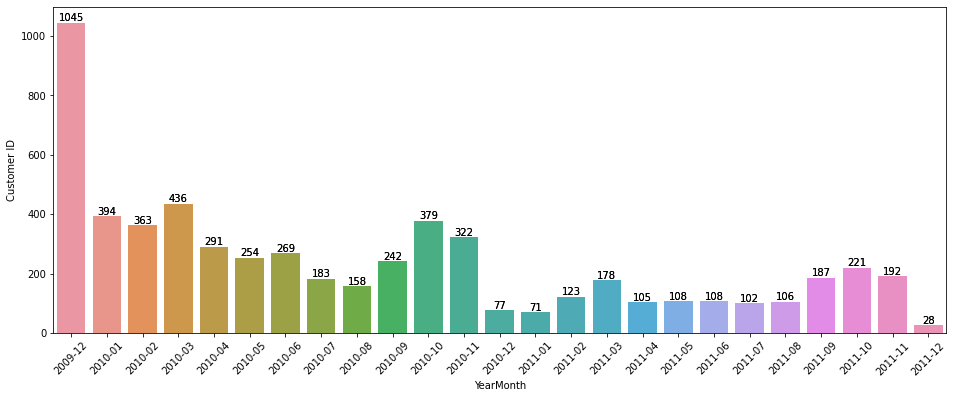

In [203]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(x='YearMonth', y='Customer ID', data=temp_pc)
ax = sns.barplot(x='YearMonth', y='Customer ID', data=temp_pc)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,     # x 좌표 (막대의 가운데)
            p.get_height() + 5,                 # y 좌표 
            int(p.get_height()),                # 표시할 숫자 (정수형)
            ha='center')                        # 가운데 정렬
    
plt.show()

### **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [204]:
retail_sum = pd.DataFrame(retail.groupby('Customer ID')['Total'].sum())


retail_sum = retail_sum.reset_index()
a =len(retail_sum)

In [205]:
b = len(retail_sum[retail_sum['Total'] >= 50])

In [206]:
print(f'총 고객 수 : {a}')
print(f'활성화된 고객 수 : { b}')

print(f'활성화율: { round(b/a*100,2) }%')

총 고객 수 : 5942
활성화된 고객 수 : 5777
활성화율: 97.22%


# 여기는 첫구매 이후로 구했을 때 활성화율

In [351]:
first_purchase = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'FirstPurchaseDate']
first_purchase



,Customer ID,FirstPurchaseDate
0,12346,2009-12-14 08:34:00
1,12347,2010-10-31 14:20:00
2,12348,2010-09-27 14:59:00
3,12349,2009-12-04 12:49:00
4,12350,2011-02-02 16:01:00
...,...,...
5937,18283,2010-02-19 17:16:00
5938,18284,2010-10-04 11:33:00
5939,18285,2010-02-17 10:24:00
5940,18286,2009-12-16 10:45:00


In [356]:
retail_after_first = retail.merge(first_purchase, on='Customer ID')

In [370]:
retail_after_first['IsFirstPurchase'] = retail_after_first['InvoiceDate'] == retail_after_first['FirstPurchaseDate']


retail_after_first

rafs = retail_after_first[~retail_after_first['IsFirstPurchase']].groupby('Customer ID')['Total'].sum().reset_index()

# 첫 구매를 환불한 데이터의 가 마이나스가 나오는 것 같다...
# 데이터가 정확하지는 않지만 여기까지만
# 이것도 중복데이터 삭제하고 , 취소데이터 매핑되는 데이터 삭제하면 다르게 나오는 것 같다.
b = len(rafs[rafs['Total'] >= 50])

print(f'총 고객 수 : {5942}')
print(f'활성화된 고객 수 : { b}')

print(f'활성화율: { round(b/5942*100,2) } %')

총 고객 수 : 5942
활성화된 고객 수 : 4169
활성화율: 70.16 %


### **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.
#히트맵 코드
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)



In [346]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12-01,2009-12-01,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12-01,2009-12-01,2009Q4,2009Q4,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,2011Q4,2011Q3,1


In [209]:
retail["cohort_month"] = retail.groupby('Customer ID')['YearMonth'].transform("min")

In [215]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           824364 non-null  object        
 1   StockCode         824364 non-null  object        
 2   Description       824364 non-null  object        
 3   Quantity          824364 non-null  int64         
 4   InvoiceDate       824364 non-null  datetime64[ns]
 5   Price             824364 non-null  float64       
 6   Customer ID       824364 non-null  int64         
 7   Country           824364 non-null  object        
 8   Total             824364 non-null  float64       
 9   YearMonth         824364 non-null  datetime64[ns]
 10  cohort_month      824364 non-null  datetime64[ns]
 11  YearMonth_quater  824364 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(2), int64(2), object(4)
memory usage: 81.8+ MB


In [347]:
# retail['YearMonth'] =retail['YearMonth'].dt.to_timestamp()
# retail['cohort_month'] = retail['cohort_month'].dt.to_timestamp()
# retail.info()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

In [218]:
retail['YearMonth_quarter'] =retail['YearMonth'].dt.to_period('Q')
retail['cohort_quarter'] = retail['cohort_month'].dt.to_period('Q')


retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           824364 non-null  object        
 1   StockCode         824364 non-null  object        
 2   Description       824364 non-null  object        
 3   Quantity          824364 non-null  int64         
 4   InvoiceDate       824364 non-null  datetime64[ns]
 5   Price             824364 non-null  float64       
 6   Customer ID       824364 non-null  int64         
 7   Country           824364 non-null  object        
 8   Total             824364 non-null  float64       
 9   YearMonth         824364 non-null  datetime64[ns]
 10  cohort_month      824364 non-null  datetime64[ns]
 11  YearMonth_quater  824364 non-null  period[Q-DEC] 
 12  cohort_quater     824364 non-null  period[Q-DEC] 
dtypes: datetime64[ns](3), float64(2), int64(2), object(4), peri

In [221]:
# retail = retail.rename({'YearMonth_quater':'YearMonth_quarter',
#               'cohort_quater':'cohort_quarter'},axis = 1)
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12-01,2009-12-01,2009Q4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12-01,2009-12-01,2009Q4,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12-01,2009-12-01,2009Q4,2009Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,2011Q4,2011Q3
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,2011Q4,2011Q3


In [230]:
retail['YearMonth_quarter'].apply(lambda x: x.ordinal) -retail['cohort_quarter'].apply(lambda x: x.ordinal)

0         0
1         0
2         0
3         0
4         0
         ..
541896    1
541895    1
541908    1
541900    1
541909    1
Length: 824364, dtype: int64

In [232]:


retail['QuarterDiff'] =  retail['YearMonth_quarter'].apply(lambda x: x.ordinal) -retail['cohort_quarter'].apply(lambda x: x.ordinal)
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter,QuarterDiff
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01,2009-12-01,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12-01,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12-01,2009Q4,2009Q4,0


In [234]:
retail =retail.rename({'QuarterDiff':'cohort_index'},axis=1)

In [148]:
# def cohort_index(df, col1, col2):
#     return df[col1] * 12 + df[col2]

# retail['cohort_index'] = cohort_index(retail, 'years_diff', 'months_diff')
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,months_diff,years_diff,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01,2009-12-01,0,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12-01,0,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12-01,0,0,0


In [382]:
retail_acti = retail[retail['Customer ID'].isin(retail_sum[retail_sum['Total'] >= 50]['Customer ID'])]


In [263]:
cohort_counts = retail_acti.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique()


cohort_counts_df = cohort_counts.to_frame().rename(columns={'Customer ID':'users'}).sort_values(by=['cohort_quarter','cohort_index'])
cohort_counts_df

users
cohort_quarter cohort_index       
2009Q4         0              1017
               1               668
               2               685
               3               618
               4               710
               5               524
               6               517
               7               509
               8               571
2010Q1         0              1152
               1               607
               2               573
               3               606
               4               416
               5               430
               6               444
               7               407
2010Q2         0               788
               1               324
               2               348
               3               182
               4               245
               5               227
               6               244
2010Q3         0               562
               1               275
               2               148
               3               155
               4               192
               5               188
2010Q4         0               757
               1               166
               2               195
               3               162
               4               274
2011Q1         0               369
               1               159
               2               125
               3               136
2011Q2         0               314
               1               141
               2               127
2011Q3         0               389
               1               207
2011Q4         0               429

In [265]:
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_quarter"])["users"].transform("max")
cohort_counts_df

users  retention_rate
cohort_quarter cohort_index                       
2009Q4         0              1017        1.000000
               1               668        0.656834
               2               685        0.673550
               3               618        0.607670
               4               710        0.698132
               5               524        0.515241
               6               517        0.508358
               7               509        0.500492
               8               571        0.561455
2010Q1         0              1152        1.000000
               1               607        0.526910
               2               573        0.497396
               3               606        0.526042
               4               416        0.361111
               5               430        0.373264
               6               444        0.385417
               7               407        0.353299
2010Q2         0               788        1.000000
               1               324        0.411168
               2               348        0.441624
               3               182        0.230964
               4               245        0.310914
               5               227        0.288071
               6               244        0.309645
2010Q3         0               562        1.000000
               1               275        0.489324
               2               148        0.263345
               3               155        0.275801
               4               192        0.341637
               5               188        0.334520
2010Q4         0               757        1.000000
               1               166        0.219287
               2               195        0.257596
               3               162        0.214003
               4               274        0.361955
2011Q1         0               369        1.000000
               1               159        0.430894
               2               125        0.338753
               3               136        0.368564
2011Q2         0               314        1.000000
               1               141        0.449045
               2               127        0.404459
2011Q3         0               389        1.000000
               1               207        0.532134
2011Q4         0               429        1.000000

In [266]:
cohort_counts = retail_acti.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique()

cohort_counts_df = cohort_counts.to_frame().rename(columns={'Customer ID':'users'}).sort_values(by=['cohort_quarter'])


cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_quarter"])["users"].transform("max") * 100

cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_quarter', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

cohort_index,0,1,2,3,4,5,6,7,8
cohort_quarter,,,,,,,,,
2009Q4,100.0,65.683382,67.354966,60.766962,69.813176,51.524090,50.835792,50.049164,56.145526
2010Q1,100.0,52.690972,49.739583,52.604167,36.111111,37.326389,38.541667,35.329861,NaN
2010Q2,100.0,41.116751,44.162437,23.096447,31.091371,28.807107,30.964467,NaN,NaN
2010Q3,100.0,48.932384,26.334520,27.580071,34.163701,33.451957,NaN,NaN,NaN
2010Q4,100.0,21.928666,25.759577,21.400264,36.195509,NaN,NaN,NaN,NaN
2011Q1,100.0,43.089431,33.875339,36.856369,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.904459,40.445860,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.213368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## 2009 Q/4의 데이터를 빼고 2010 Q/1 데이터와 계산하면 예시결과와 비슷해지지만 데이터의 오차가 생기므로 그렇게 진행하지는 않았다.

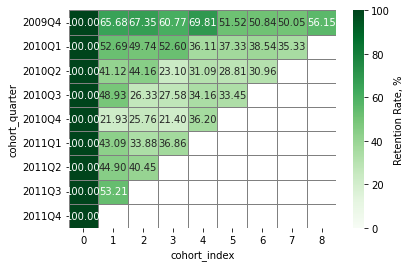

In [267]:
heatmap = sns.heatmap(
    data=cohorts_pivot,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

In [395]:
retail = retail[retail['InvoiceDate'] >= '2010-01-01']

retail['YearMonth'] =retail['InvoiceDate'].dt.to_period('M')
retail["cohort_month"] = retail.groupby('Customer ID')['YearMonth'].transform("min")




In [403]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792604 entries, 45228 to 541909
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            792604 non-null  object        
 1   StockCode          792604 non-null  object        
 2   Description        792604 non-null  object        
 3   Quantity           792604 non-null  int64         
 4   InvoiceDate        792604 non-null  datetime64[ns]
 5   Price              792604 non-null  float64       
 6   Customer ID        792604 non-null  int64         
 7   Country            792604 non-null  object        
 8   Total              792604 non-null  float64       
 9   YearMonth          792604 non-null  period[M]     
 10  cohort_month       792604 non-null  period[M]     
 11  YearMonth_quarter  792604 non-null  period[Q-DEC] 
 12  cohort_quarter     792604 non-null  period[Q-DEC] 
 13  cohort_index       792604 non-null  int6

In [405]:
retail['YearMonth'] =retail['YearMonth'].dt.to_timestamp()
retail['cohort_month'] = retail['cohort_month'].dt.to_timestamp()

In [412]:
# retail = retail.drop('cohort_index', axis= 1)

In [413]:
retail['YearMonth_quarter'] =retail['YearMonth'].dt.to_period('Q')
retail['cohort_quarter'] = retail['cohort_month'].dt.to_period('Q')


retail['QuarterDiff'] =  retail['YearMonth_quarter'].apply(lambda x: x.ordinal) -retail['cohort_quarter'].apply(lambda x: x.ordinal)

retail =retail.rename({'QuarterDiff':'cohort_index'},axis=1)


retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter,cohort_index
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,22.50,2010-01-01,2010-01-01,2010Q1,2010Q1,0
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,-4.25,2010-01-01,2010-01-01,2010Q1,2010Q1,0
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,22.50,2010-01-01,2010-01-01,2010Q1,2010Q1,0
45238,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,83.40,2010-01-01,2010-01-01,2010Q1,2010Q1,0
45237,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,8.50,2010-01-01,2010-01-01,2010Q1,2010Q1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,2011Q4,2011Q3,1


In [414]:
cohort_counts = retail.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique()

cohort_counts_df = cohort_counts.to_frame().rename(columns={'Customer ID':'users'}).sort_values(by=['cohort_quarter'])


cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_quarter"])["users"].transform("max") * 100

cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_quarter', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

cohort_index,0,1,2,3,4,5,6,7
cohort_quarter,,,,,,,,
2010Q1,100.0,61.736334,57.395498,61.521972,45.766345,45.712755,45.980707,45.659164
2010Q2,100.0,41.250000,46.562500,24.166667,32.708333,30.000000,32.916667,NaN
2010Q3,100.0,47.943038,26.582278,26.740506,32.753165,33.227848,NaN,NaN
2010Q4,100.0,21.299639,24.428400,20.216606,35.740072,NaN,NaN,NaN
2011Q1,100.0,42.257218,34.120735,36.482940,NaN,NaN,NaN,NaN
2011Q2,100.0,44.135802,39.506173,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,52.985075,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


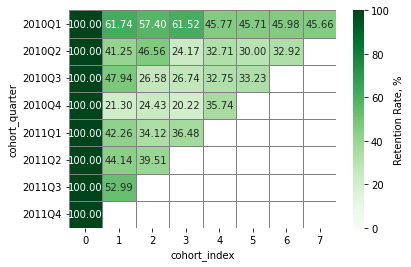

In [415]:
heatmap = sns.heatmap(
    data=cohorts_pivot,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)# 예시 결과와 같은 결과

### **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
- 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

In [416]:
average_quantity  = retail.groupby(['cohort_quarter', 'cohort_index'])['Quantity'].mean()
 
average_quantity_df = average_quantity.to_frame().rename(columns={'Quantity':'average_quantity'}).sort_values(by=['cohort_quarter'])
cohort_counts_df


average_quantity = average_quantity_df.pivot_table(index='cohort_quarter', columns = 'cohort_index', values = 'average_quantity')
average_quantity

cohort_index,0,1,2,3,4,5,6,7
cohort_quarter,,,,,,,,
2010Q1,15.510993,13.124922,14.435120,13.058323,13.955552,13.709837,15.056658,13.467552
2010Q2,10.286598,11.191280,10.138638,14.791773,14.150777,15.391399,9.686712,NaN
2010Q3,13.460858,7.923792,9.625533,11.845156,13.902699,10.172576,NaN,NaN
2010Q4,7.583965,8.365035,8.343750,9.738029,8.736051,NaN,NaN,NaN
2011Q1,9.601305,13.421756,12.384757,11.467702,NaN,NaN,NaN,NaN
2011Q2,8.841937,11.265795,9.163995,NaN,NaN,NaN,NaN,NaN
2011Q3,9.152938,6.210530,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,9.109059,NaN,NaN,NaN,NaN,NaN,NaN,NaN


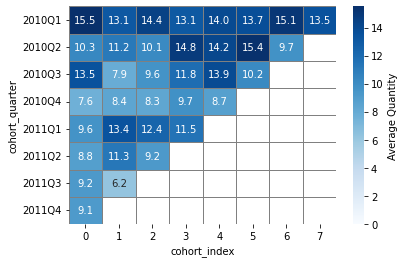

In [417]:
#heatmap 코드
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
) # 예시 결과와 같은 값  12월 데이터를 지우지 않으면 그대로이다.

In [283]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009-12-01,2009-12-01,2009Q4,2009Q4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009-12-01,2009-12-01,2009Q4,2009Q4,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,2011Q4,2011Q3,1
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,2011Q4,2011Q3,1


### **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [296]:
customer_YearMonth_total = retail_acti.groupby(['Customer ID', 'YearMonth'])['Total'].sum().reset_index()


In [297]:
arpu = customer_YearMonth_total.groupby('YearMonth').agg(
    total_revenue=('Total', 'sum'),
    num_customers=('Customer ID', 'nunique')
)


arpu['ARPU'] = arpu['total_revenue'] / arpu['num_customers']

arpu = arpu.drop(['total_revenue','num_customers'],axis=1)

<Figure size 864x432 with 0 Axes>

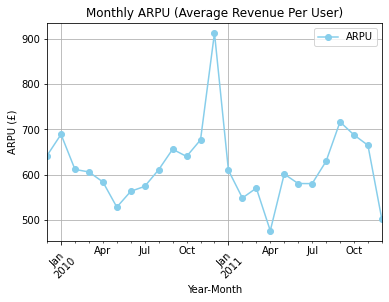

In [298]:
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [299]:
retail_acti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823210 entries, 0 to 541909
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            823210 non-null  object        
 1   StockCode          823210 non-null  object        
 2   Description        823210 non-null  object        
 3   Quantity           823210 non-null  int64         
 4   InvoiceDate        823210 non-null  datetime64[ns]
 5   Price              823210 non-null  float64       
 6   Customer ID        823210 non-null  int64         
 7   Country            823210 non-null  object        
 8   Total              823210 non-null  float64       
 9   YearMonth          823210 non-null  datetime64[ns]
 10  cohort_month       823210 non-null  datetime64[ns]
 11  YearMonth_quarter  823210 non-null  period[Q-DEC] 
 12  cohort_quarter     823210 non-null  period[Q-DEC] 
 13  cohort_index       823210 non-null  int64   

### **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)
- 예시결과

CLV -값은 돈을 벌어가는 건가.


In [373]:
retail[~(retail['Total'] >= 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,YearMonth,cohort_month,YearMonth_quarter,cohort_quarter,cohort_index
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321,Australia,-35.40,2009-12-01,2009-12-01,2009Q4,2009Q4,0
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321,Australia,-20.40,2009-12-01,2009-12-01,2009Q4,2009Q4,0
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321,Australia,-15.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-17.00,2009-12-01,2009-12-01,2009Q4,2009Q4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,2011-12-01,2011-05-01,2011Q4,2011Q2,2
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,2011-12-01,2009-12-01,2011Q4,2009Q4,8
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,2011-12-01,2009-12-01,2011Q4,2009Q4,8
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,2011-12-01,2010-09-01,2011Q4,2010Q3,5


In [374]:
# # TotalPrice 계산 (총 매출)
# df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# # 고객별 분석을 위한 데이터 준비
# customer_data = df.groupby('CustomerID').agg({
#     'InvoiceNo': 'nunique',        # 구매 횟수
#     'TotalPrice': 'sum',           # 총 지출 금액
#     'InvoiceDate': ['min', 'max']  # 첫 구매일과 마지막 구매일
# }).reset_index()



customer_data = retail.groupby('Customer ID').agg({
    'Invoice': 'nunique',        # 구매 횟수
    'Total': 'sum',           # 총 지출 금액
    'InvoiceDate': ['min', 'max']  # 첫 구매일과 마지막 구매일
}).reset_index()

customer_data





customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']

# # Customer Lifetime (일 단위)
customer_data['CustomerLifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days

# # 구매 
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

# # CLV 계산 Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기
customer_data['CLV'] = (customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency'] * (((customer_data['CustomerLifetime']+1) / 365)).astype(int) )
customer_data[['CustomerID','CLV', 'TotalRevenue','PurchaseFrequency', 'CustomerLifetime']].sort_values(by='CustomerLifetime')


,CustomerID,CLV,TotalRevenue,PurchaseFrequency,CustomerLifetime
2970,15316,0.00,165.00,1,0
3202,15548,0.00,158.09,1,0
4281,16627,0.00,322.80,1,0
3207,15553,0.00,437.23,1,0
1567,13913,0.00,42.22,1,0
...,...,...,...,...,...
5082,17428,62476.12,31238.06,51,737
1431,13777,112033.14,56016.57,73,737
2565,14911,540497.06,270248.53,510,737
2965,15311,227026.14,113513.07,270,738


평균 대기시간: 12.72
표준편차: 1.38


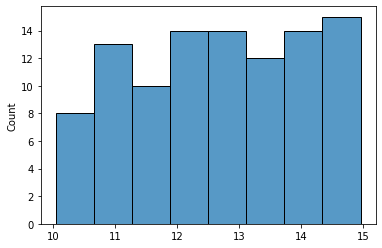

In [336]:
from scipy.stats import *
import numpy as np
# loc = 0 , scale = 1
a = uniform.rvs(loc = 10, scale = 5,size = 100)
sns.histplot(
a )
mean_waiting_time = np.mean(a)
std_waiting_time = np.std(a)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

In [340]:
outcomes = bernoulli.rvs(0.3, size = 10)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 1 1 1 0 0 0 0 0]
성공 횟수: 3


In [344]:
#rvs(n, p, loc=0, size=1, random_state=None)

scores = binom.rvs(n=5, p=0.7,size=20)
average_score = scores.sum() / len(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [2 5 4 3 3 4 3 5 4 2 4 4 4 2 4 4 3 2 4 4]
평균 점수: 3.50


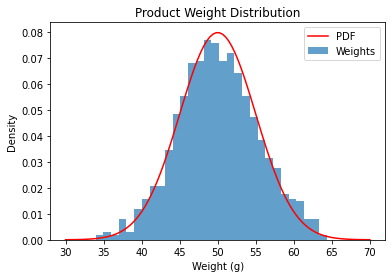

45g 이상 55g 이하 비율: 68.27%


In [345]:
mu = 50
sigma = 5
sample_count = 1000
# 샘플 생성


weights = norm.rvs(loc=mu, scale=sigma, size=sample_count)
'''
여기 코드를 작성해주세요
'''

# 45g 이상 55g 이하의 비율 계산
'''
여기 코드를 작성해주세요
'''


within_range = norm.cdf(55,loc=mu, scale=sigma)- norm.cdf(45,loc=mu, scale=sigma)
# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")